<a href="https://colab.research.google.com/github/ParkJongHyeok99/Data_Analysis_Airbnb/blob/main/Data_Analysis_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google colab 연동 및 데이터 전처리

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np

source_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/detailed_listings.csv')

source_data.shape

delete_columns_data = source_data.drop(labels=['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
                                               'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url',
                                               'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                                               'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                                               'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
                                               'has_availability', 'availability_30', 'availability_60', 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
                                               'last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                                               'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], axis = 1)       #사용하지 않는 열 제거

delete_columns_data.shape

(38792, 25)

In [57]:
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,9630344,NaN,NaN,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,364,5,4.8,4.6,5.0,5.0,5.0,4.8,5.0,f
1,3533741,NaN,NaN,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,9731039,NaN,NaN,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [58]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            25618 non-null  object 
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      21892 non-null  float64
 11  beds                          38129 non-null  float64
 12  amenities                     38792 non-null  object 
 13  p

In [59]:
#ID 변수인 id값의 중복 여부 체크
n = len(pd.unique(delete_columns_data['id']))
print(n)

38792


In [60]:
#구간 변수 : host_response_rate, latitude , longitude , accommodates, bedrooms, beds, availability_90, availability_365, number_of_reviews, amenities
#구간 변수 : review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value (17개)

#host_response_rate을 numeric으로 변환
delete_columns_data['host_response_rate'] = delete_columns_data['host_response_rate'].str.replace('%', '').astype(float)


#amenities변수를 개수로 변환
delete_columns_data['amenities'] = delete_columns_data['amenities'].apply(lambda x: x.count(','))
delete_columns_data['amenities'].astype(int)
delete_columns_data['amenities'] = delete_columns_data['amenities'] + 1

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            25618 non-null  float64
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      21892 non-null  float64
 11  beds                          38129 non-null  float64
 12  amenities                     38792 non-null  int64  
 13  p

In [61]:
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,9630344,NaN,NaN,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,364,5,4.8,4.6,5.0,5.0,5.0,4.8,5.0,f
1,3533741,NaN,NaN,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,9731039,NaN,NaN,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [62]:
#구간 변수 결측값 평균으로 대체
#host_response_rate
mean_host_response_rate = delete_columns_data['host_response_rate'].mean()
delete_columns_data['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

#bedrooms
mean_bedrooms = delete_columns_data['bedrooms'].mean()
delete_columns_data['bedrooms'].fillna(mean_bedrooms, inplace=True)

#beds
mean_beds = delete_columns_data['beds'].mean()
delete_columns_data['beds'].fillna(mean_beds, inplace=True)

#beds
mean_beds = delete_columns_data['beds'].mean()
delete_columns_data['beds'].fillna(mean_beds, inplace=True)

#review_scores_rating
mean_review_scores_rating = delete_columns_data['review_scores_rating'].mean()
delete_columns_data['review_scores_rating'].fillna(mean_review_scores_rating, inplace=True)

#review_scores_accuracy
mean_review_scores_accuracy = delete_columns_data['review_scores_accuracy'].mean()
delete_columns_data['review_scores_accuracy'].fillna(mean_review_scores_accuracy, inplace=True)

#review_scores_cleanliness
mean_review_scores_cleanliness = delete_columns_data['review_scores_cleanliness'].mean()
delete_columns_data['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)

#review_scores_checkin
mean_review_scores_checkin = delete_columns_data['review_scores_checkin'].mean()
delete_columns_data['review_scores_checkin'].fillna(mean_review_scores_checkin, inplace=True)

#review_scores_communication
mean_review_scores_communication = delete_columns_data['review_scores_communication'].mean()
delete_columns_data['review_scores_communication'].fillna(mean_review_scores_communication, inplace=True)

#review_scores_location
mean_review_scores_location = delete_columns_data['review_scores_location'].mean()
delete_columns_data['review_scores_location'].fillna(mean_review_scores_location, inplace=True)

#review_scores_value
mean_review_scores_value = delete_columns_data['review_scores_value'].mean()
delete_columns_data['review_scores_value'].fillna(mean_review_scores_value, inplace=True)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38792 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38792 non-null  int64  
 1   host_response_time            25618 non-null  object 
 2   host_response_rate            38792 non-null  float64
 3   host_is_superhost             38537 non-null  object 
 4   neighbourhood_group_cleansed  38792 non-null  object 
 5   latitude                      38792 non-null  float64
 6   longitude                     38792 non-null  float64
 7   room_type                     38792 non-null  object 
 8   accommodates                  38792 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38792 non-null  float64
 11  beds                          38792 non-null  float64
 12  amenities                     38792 non-null  int64  
 13  p

In [63]:
#범주형 변수 : host_response_time, host_is_superhost, neighbourhood_group_cleansed, room_type, bathrooms_text, instant_bookable, price_B (7개)

#host_is_superhost
delete_columns_data['host_is_superhost'].fillna('f', inplace=True)

#bathrooms_text
delete_columns_data = delete_columns_data.dropna(subset=['bathrooms_text'])

#host_response_time
delete_columns_data['host_response_time'].fillna('a few days or more', inplace=True)

<ipython-input-63-45c77b50c0b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delete_columns_data['host_response_time'].fillna('a few days or more', inplace=True)


In [64]:
unique_values = delete_columns_data['bathrooms_text'].unique()
print(unique_values)

['1 shared bath' '1 bath' '1 private bath' '2 baths' '2.5 baths'
 '1.5 baths' '4 shared baths' '2 shared baths' '1.5 shared baths'
 'Shared half-bath' 'Half-bath' '3 baths' '3.5 baths' '3 shared baths'
 '4.5 baths' '4 baths' '0 shared baths' '0 baths' '6.5 baths'
 '2.5 shared baths' '5 baths' '6 baths' '7 baths' '15.5 baths'
 'Private half-bath' '5.5 shared baths' '8 baths' '6 shared baths'
 '5.5 baths' '4.5 shared baths' '8.5 baths' '3.5 shared baths']


In [65]:
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('1 private bath', '1 bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Shared half-bath', '0.5 shared bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Half-bath', '0.5 bath')
delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Private half-bath', '0.5 bath')

<ipython-input-65-64e3779e9cbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('1 private bath', '1 bath')
<ipython-input-65-64e3779e9cbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delete_columns_data['bathrooms_text'] = delete_columns_data['bathrooms_text'].str.replace('Shared half-bath', '0.5 shared bath')
<ipython-input-65-64e3779e9cbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [66]:
unique_values = delete_columns_data['bathrooms_text'].unique()
print(unique_values)

['1 shared bath' '1 bath' '2 baths' '2.5 baths' '1.5 baths'
 '4 shared baths' '2 shared baths' '1.5 shared baths' '0.5 shared bath'
 '0.5 bath' '3 baths' '3.5 baths' '3 shared baths' '4.5 baths' '4 baths'
 '0 shared baths' '0 baths' '6.5 baths' '2.5 shared baths' '5 baths'
 '6 baths' '7 baths' '15.5 baths' '5.5 shared baths' '8 baths'
 '6 shared baths' '5.5 baths' '4.5 shared baths' '8.5 baths'
 '3.5 shared baths']


In [67]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

타겟 변수 설정

In [68]:
#price 변수 object에서 float로 변환
delete_columns_data['price'] = delete_columns_data['price'].str.replace('[\$,]', '', regex=True).astype(float)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

In [69]:
# 타겟 변수 값이 중위수 이상이면 1, 아니면 0
# 이진값 타겟 변수 price_B
c1 = delete_columns_data['price'] >= delete_columns_data['price'].median()
c0 = delete_columns_data['price'] < delete_columns_data['price'].median()

delete_columns_data.loc[c1, "price_B"] = 1
delete_columns_data.loc[c0, "price_B"] = 0
delete_columns_data.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_B
0,9630344,a few days or more,92.557264,f,Brooklyn,40.68457,-73.91181,Private room,1,1 shared bath,...,5,4.800000,4.600000,5.000000,5.000000,5.000000,4.80000,5.000000,f,0.0
1,3533741,a few days or more,92.557264,f,Manhattan,40.76878,-73.98719,Private room,2,1 bath,...,0,4.625896,4.740582,4.622926,4.811373,4.805698,4.72422,4.621431,f,0.0
2,9731039,a few days or more,92.557264,f,Queens,40.74343,-73.91865,Entire home/apt,1,1 bath,...,0,4.625896,4.740582,4.622926,4.811373,4.805698,4.72422,4.621431,f,0.0


In [70]:
delete_columns_data['price_B'] = delete_columns_data['price_B'].astype('object')
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38750 entries, 0 to 38791
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

이상값 제거(구간 변수)

<Axes: xlabel='review_scores_value'>

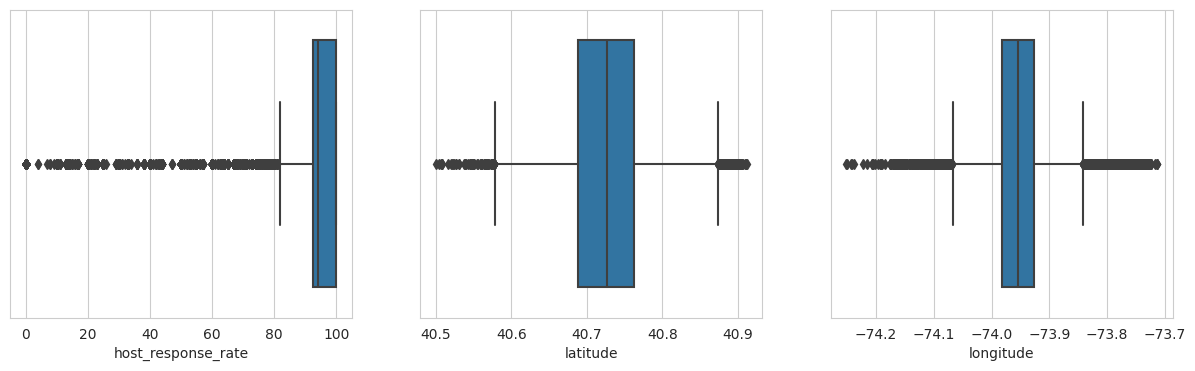

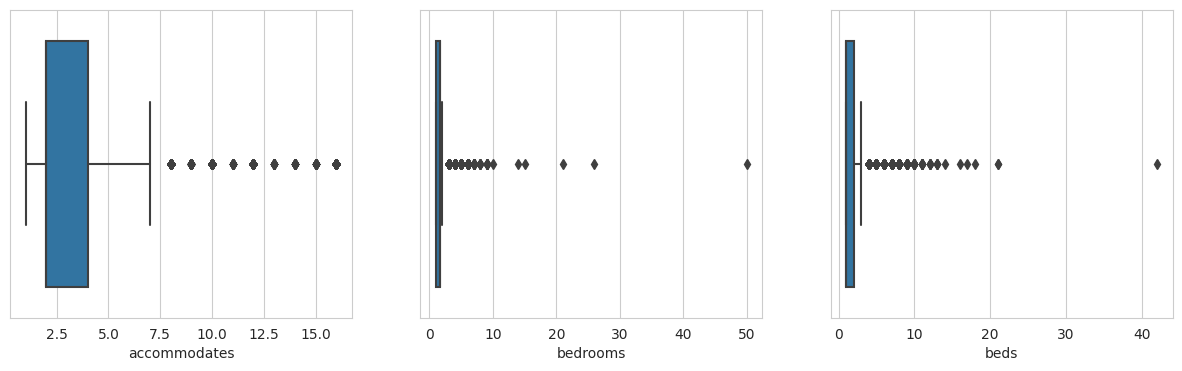

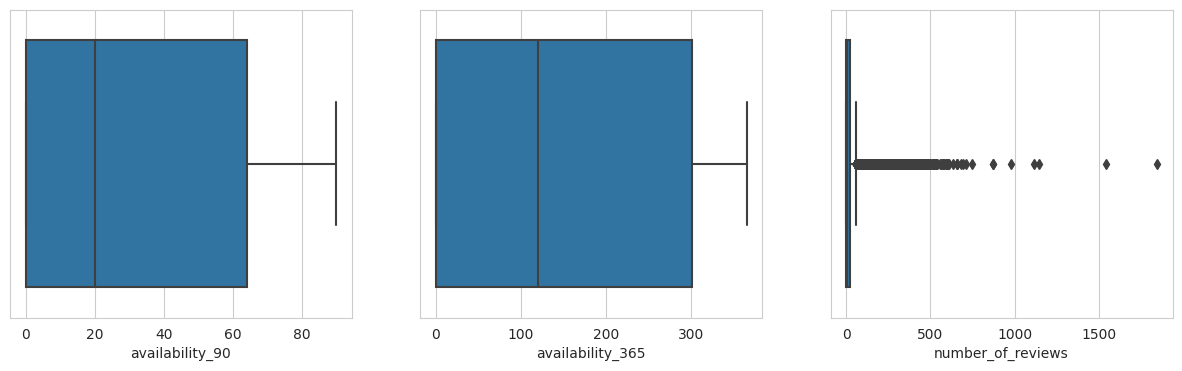

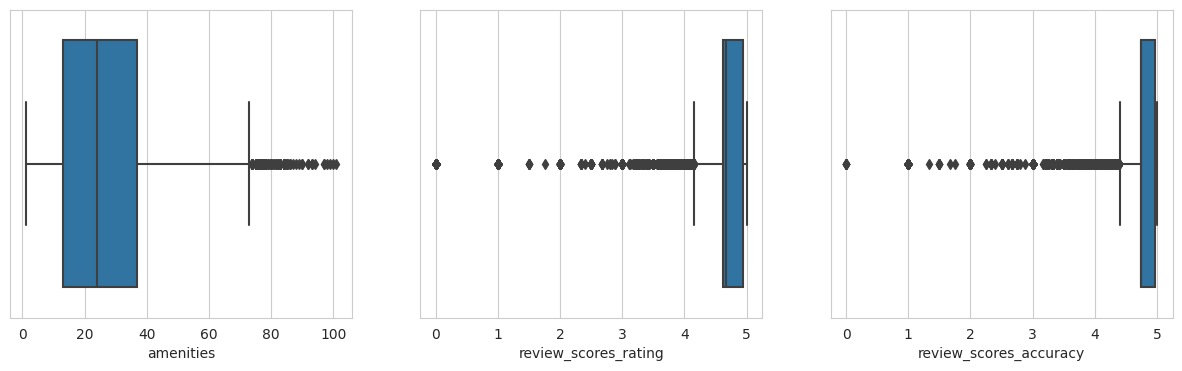

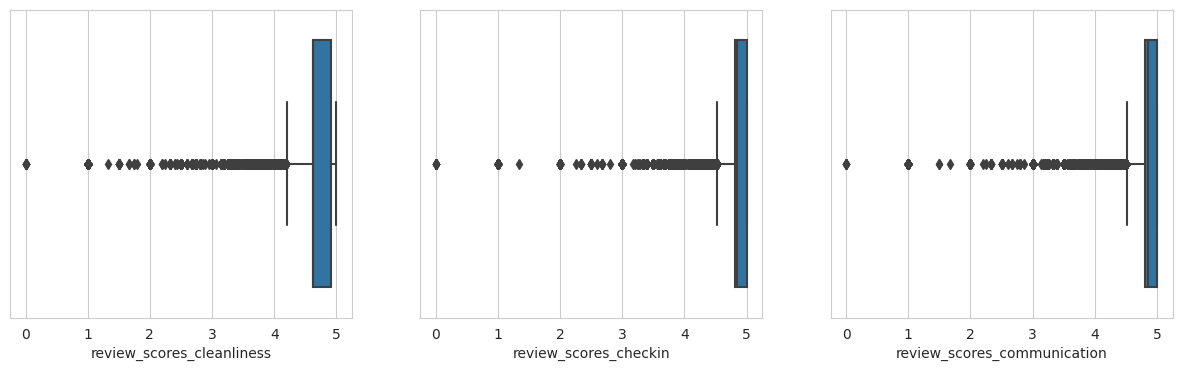

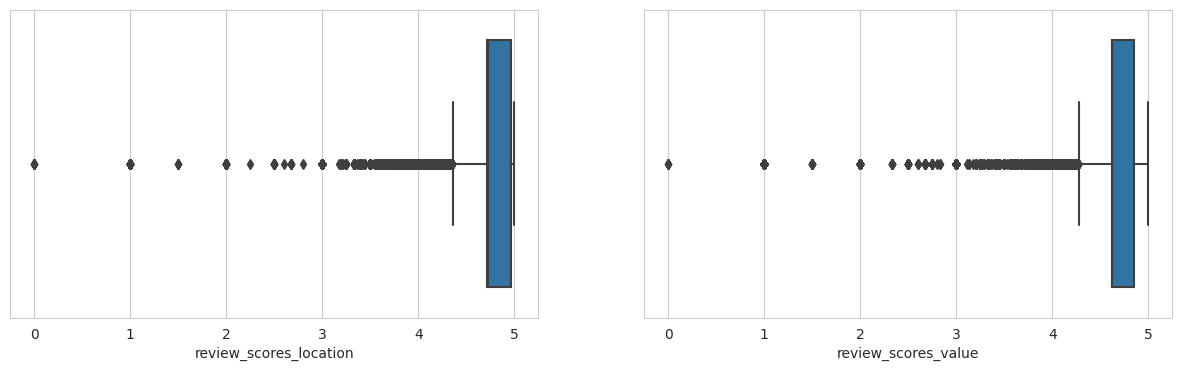

In [71]:
# 구간변수 이상값 확인 및 제거

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'host_response_rate', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'latitude', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'longitude', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'accommodates', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'bedrooms', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'beds', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'availability_90', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'availability_365', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'number_of_reviews', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'amenities', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_rating', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'review_scores_accuracy', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_cleanliness', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_checkin', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'review_scores_communication', data = delete_columns_data)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_location', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'review_scores_value', data = delete_columns_data)


In [72]:
#host_response_rate, accommodates, bedrooms, beds의 이상치를 하한값과 상한값으로 대체
#나머지 변수들은 이상치 처리X

Q1 = delete_columns_data[['host_response_rate', 'accommodates', 'bedrooms', 'beds']].quantile(0.25)
Q3 = delete_columns_data[['host_response_rate', 'accommodates', 'bedrooms', 'beds']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

host_response_rate    7.442736
accommodates          2.000000
bedrooms              0.591403
beds                  1.000000
dtype: float64


In [73]:
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
print(Lower)
print(Upper)

host_response_rate    81.393161
accommodates          -1.000000
bedrooms               0.112895
beds                  -0.500000
dtype: float64
host_response_rate    111.164103
accommodates            7.000000
bedrooms                2.478508
beds                    3.500000
dtype: float64


In [74]:
delete_columns_data['host_response_rate'] = delete_columns_data['host_response_rate'].apply(lambda x: 82 if x < 82 else x)
delete_columns_data['accommodates'] = delete_columns_data['accommodates'].apply(lambda x: 7 if x > 7 else x)
delete_columns_data['bedrooms'] = delete_columns_data['bedrooms'].apply(lambda x: 2.478508 if x > 2.478508 else x)
delete_columns_data['beds'] = delete_columns_data['beds'].apply(lambda x: 3.5 if x > 3.5 else x)

In [75]:
delete_columns_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/preprocessing_completed.csv', index = False)

탐색적 자료 분석 및 시각화

결측값이 50% 초과인 변수 제거

In [76]:
import pandas as pd

#결측값이 50% 초과인 변수는 전처리 과정에서 수행했으므로 미조치
preprocessing_completed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/preprocessing_completed.csv')
preprocessing_completed['price_B'] = preprocessing_completed['price_B'].astype('object')
preprocessing_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            38750 non-null  int64  
 1   host_response_time            38750 non-null  object 
 2   host_response_rate            38750 non-null  float64
 3   host_is_superhost             38750 non-null  object 
 4   neighbourhood_group_cleansed  38750 non-null  object 
 5   latitude                      38750 non-null  float64
 6   longitude                     38750 non-null  float64
 7   room_type                     38750 non-null  object 
 8   accommodates                  38750 non-null  int64  
 9   bathrooms_text                38750 non-null  object 
 10  bedrooms                      38750 non-null  float64
 11  beds                          38750 non-null  float64
 12  amenities                     38750 non-null  int64  
 13  p

구간 변수 요약 통계 검토

In [77]:
#요약 통계가 필요 없는 id, latitude, longitude 변수는 제거하고 검토
interval_variable = preprocessing_completed[['host_response_rate', 'accommodates', 'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                                            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
interval_variable.describe()

,host_response_rate,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000
mean,95.077469,2.780568,1.516860,1.554757,26.322994,32.874039,148.848284,25.373135,4.626053,4.740621,4.623132,4.811376,4.805671,4.724157,4.621473
std,5.415922,1.624631,0.446453,0.811567,15.690079,34.844344,142.250654,55.877476,0.636900,0.412740,0.476852,0.359257,0.385890,0.357005,0.445515
min,82.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.557264,2.000000,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000,4.625896,4.740582,4.622926,4.811373,4.805698,4.720000,4.621431
50%,94.000000,2.000000,1.591403,1.000000,24.000000,20.000000,120.000000,4.000000,4.670000,4.750000,4.622926,4.840000,4.860000,4.724220,4.621431
75%,100.000000,4.000000,1.591403,2.000000,37.000000,64.000000,301.000000,24.000000,4.940000,4.970000,4.910000,5.000000,5.000000,4.960000,4.850000
max,100.000000,7.000000,2.478508,3.500000,101.000000,90.000000,365.000000,1843.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [78]:
#구간 변수 왜도 확인
interval_variable.skew()

host_response_rate            -0.945186
accommodates                   1.137820
bedrooms                       0.429585
beds                           1.223861
amenities                      0.702635
availability_90                0.446489
availability_365               0.278259
number_of_reviews              5.797354
review_scores_rating          -5.266428
review_scores_accuracy        -5.466128
review_scores_cleanliness     -3.974320
review_scores_checkin         -6.593173
review_scores_communication   -6.247293
review_scores_location        -4.989087
review_scores_value           -4.309320
dtype: float64

In [79]:

#로그 변환 및 boxcox 변환
import numpy as np
import pandas as pd
from scipy.stats import boxcox


#로그 변환 및 boxcox 변환
interval_variable['number_of_reviews'] = np.log(interval_variable['number_of_reviews'] + 1)
interval_variable['review_scores_rating'] = pd.Series(boxcox(interval_variable['review_scores_rating'] + 0.1)[0])
interval_variable['review_scores_accuracy'] = pd.Series(boxcox(interval_variable['review_scores_accuracy'] + 0.1)[0])
interval_variable['review_scores_cleanliness'] = pd.Series(boxcox(interval_variable['review_scores_cleanliness'] + 0.1)[0])
interval_variable['review_scores_checkin'] = pd.Series(boxcox(interval_variable['review_scores_checkin'] + 0.1)[0])
interval_variable['review_scores_communication'] = pd.Series(boxcox(interval_variable['review_scores_communication'] + 0.1)[0])
interval_variable['review_scores_location'] = pd.Series(boxcox(interval_variable['review_scores_location'] + 0.1)[0])
interval_variable['review_scores_value'] = pd.Series(boxcox(interval_variable['review_scores_value'] + 0.1)[0])
# skewness 확인
interval_variable.skew()

<ipython-input-79-7be3032669ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_variable['number_of_reviews'] = np.log(interval_variable['number_of_reviews'] + 1)
<ipython-input-79-7be3032669ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_variable['review_scores_rating'] = pd.Series(boxcox(interval_variable['review_scores_rating'] + 0.1)[0])
<ipython-input-79-7be3032669ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

host_response_rate            -0.945186
accommodates                   1.137820
bedrooms                       0.429585
beds                           1.223861
amenities                      0.702635
availability_90                0.446489
availability_365               0.278259
number_of_reviews              0.465076
review_scores_rating          -1.014617
review_scores_accuracy        -0.500392
review_scores_cleanliness     -0.368958
review_scores_checkin         -0.607583
review_scores_communication   -0.672716
review_scores_location        -0.303455
review_scores_value           -0.282326
dtype: float64

In [80]:
interval_variable.kurtosis()

host_response_rate             0.221320
accommodates                   0.476822
bedrooms                      -0.516221
beds                           0.197015
amenities                     -0.096265
availability_90               -1.426175
availability_365              -1.569642
number_of_reviews             -0.909421
review_scores_rating           1.416735
review_scores_accuracy        -0.162085
review_scores_cleanliness     -0.302378
review_scores_checkin         -0.117557
review_scores_communication   -0.095757
review_scores_location        -0.379508
review_scores_value           -0.018438
dtype: float64

구간 변수 상관관계 검토

In [81]:
round(interval_variable.corr(), 2)

,host_response_rate,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
host_response_rate,1.00,0.09,0.06,0.10,0.27,0.11,0.14,0.14,0.10,0.06,0.10,0.06,0.09,-0.01,0.04
accommodates,0.09,1.00,0.49,0.78,0.23,0.12,0.13,0.08,0.01,-0.02,0.03,-0.02,-0.01,-0.03,-0.03
bedrooms,0.06,0.49,1.00,0.57,0.13,0.09,0.10,0.03,0.00,-0.02,-0.00,-0.00,-0.01,-0.07,-0.00
beds,0.10,0.78,0.57,1.00,0.25,0.12,0.14,0.11,0.02,-0.01,0.04,0.00,0.01,-0.04,-0.00
amenities,0.27,0.23,0.13,0.25,1.00,0.29,0.31,0.39,0.23,0.15,0.23,0.13,0.15,0.02,0.12
availability_90,0.11,0.12,0.09,0.12,0.29,1.00,0.72,0.13,0.01,-0.08,0.04,-0.07,-0.08,-0.12,-0.08
availability_365,0.14,0.13,0.10,0.14,0.31,0.72,1.00,0.11,0.01,-0.08,0.04,-0.06,-0.08,-0.10,-0.10
number_of_reviews,0.14,0.08,0.03,0.11,0.39,0.13,0.11,1.00,0.20,0.13,0.17,0.12,0.15,0.02,0.13
review_scores_rating,0.10,0.01,0.00,0.02,0.23,0.01,0.01,0.20,1.00,0.73,0.69,0.61,0.66,0.46,0.71
review_scores_accuracy,0.06,-0.02,-0.02,-0.01,0.15,-0.08,-0.08,0.13,0.73,1.00,0.65,0.63,0.65,0.46,0.70


구간 변수 기초 통계량 및 시각화

기초 통계량

In [82]:
interval_variable = preprocessing_completed[['host_response_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                                            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']]
interval_variable.describe()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,amenities,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000
mean,95.077469,40.729383,-73.945808,2.780568,1.516860,1.554757,26.322994,32.874039,148.848284,25.373135,4.626053,4.740621,4.623132,4.811376,4.805671,4.724157,4.621473,215.959381
std,5.415922,0.056735,0.055128,1.624631,0.446453,0.811567,15.690079,34.844344,142.250654,55.877476,0.636900,0.412740,0.476852,0.359257,0.385890,0.357005,0.445515,496.167553
min,82.000000,40.500314,-74.251907,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,92.557264,40.688790,-73.982800,2.000000,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000,4.625896,4.740582,4.622926,4.811373,4.805698,4.720000,4.621431,79.000000
50%,94.000000,40.726275,-73.953870,2.000000,1.591403,1.000000,24.000000,20.000000,120.000000,4.000000,4.670000,4.750000,4.622926,4.840000,4.860000,4.724220,4.621431,135.000000
75%,100.000000,40.762690,-73.926191,4.000000,1.591403,2.000000,37.000000,64.000000,301.000000,24.000000,4.940000,4.970000,4.910000,5.000000,5.000000,4.960000,4.850000,225.000000
max,100.000000,40.911380,-73.713650,7.000000,2.478508,3.500000,101.000000,90.000000,365.000000,1843.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30000.000000


시각화 - 박스 플롯으로 변수의 분포 확인

<Axes: xlabel='review_scores_value'>

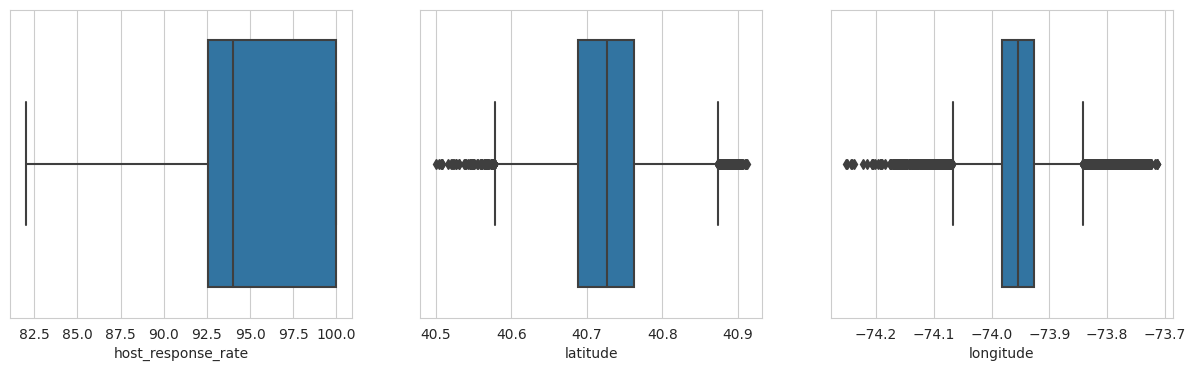

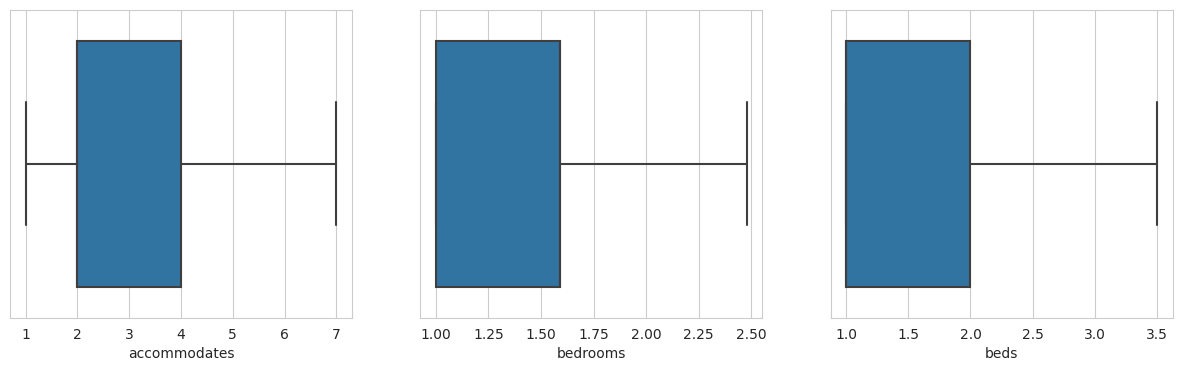

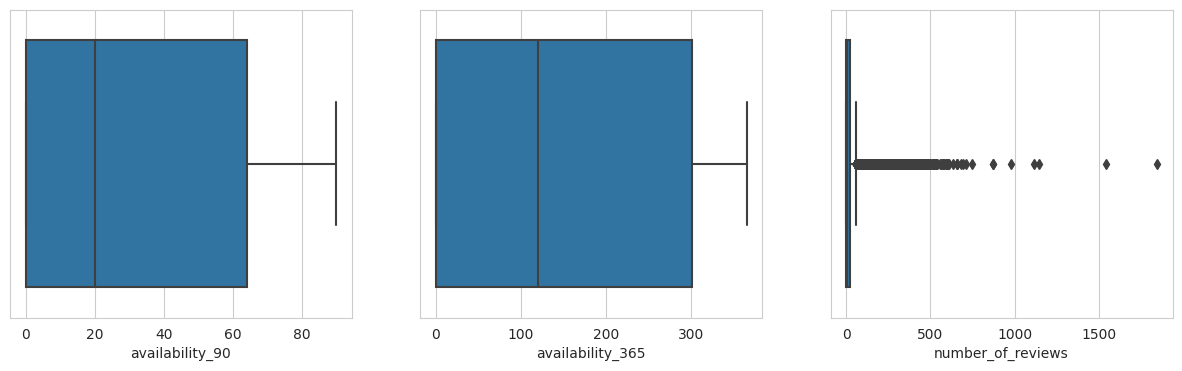

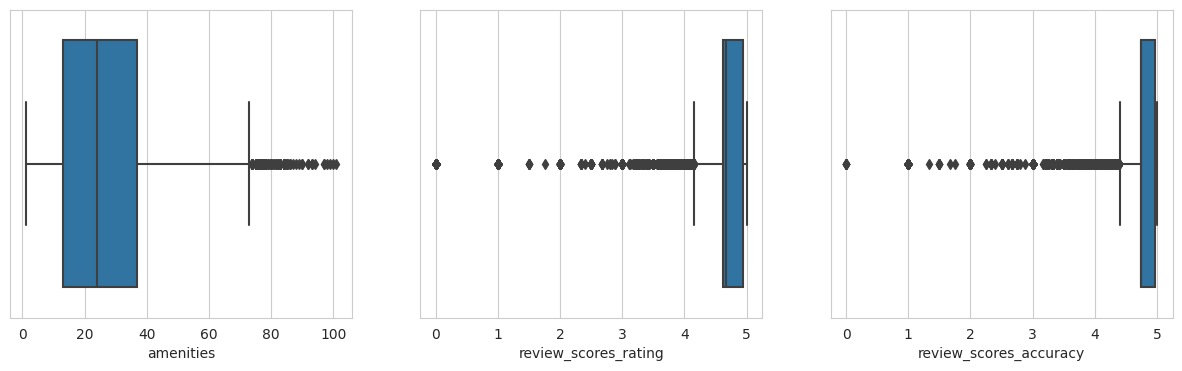

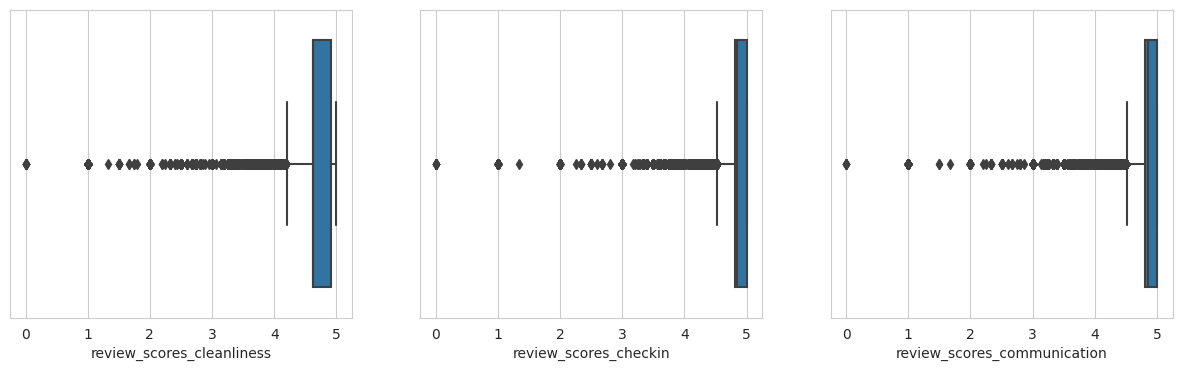

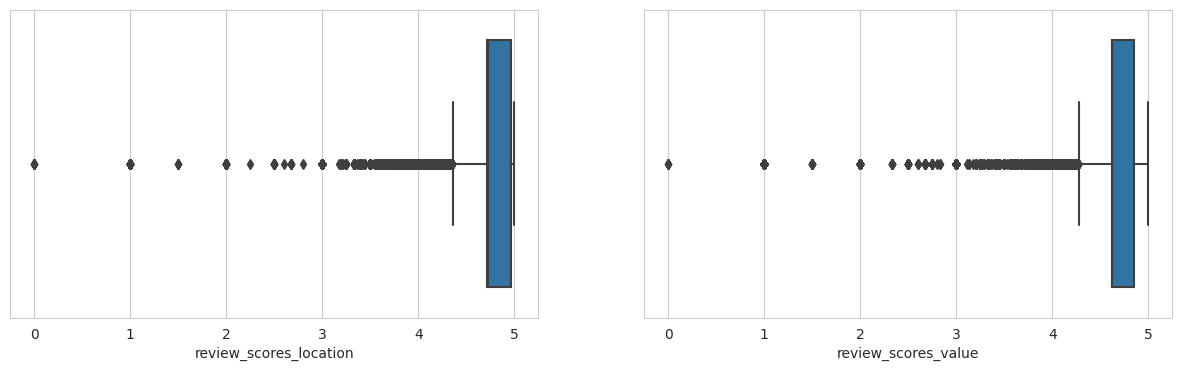

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'host_response_rate', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'latitude', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'longitude', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'accommodates', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'bedrooms', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'beds', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'availability_90', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'availability_365', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'number_of_reviews', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'amenities', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'review_scores_rating', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'review_scores_accuracy', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_cleanliness', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'review_scores_checkin', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'review_scores_communication', data = interval_variable)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'review_scores_location', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'review_scores_value', data = interval_variable)

시각화2 - 히트맵으로 상관계수 관계 확인

<Axes: >

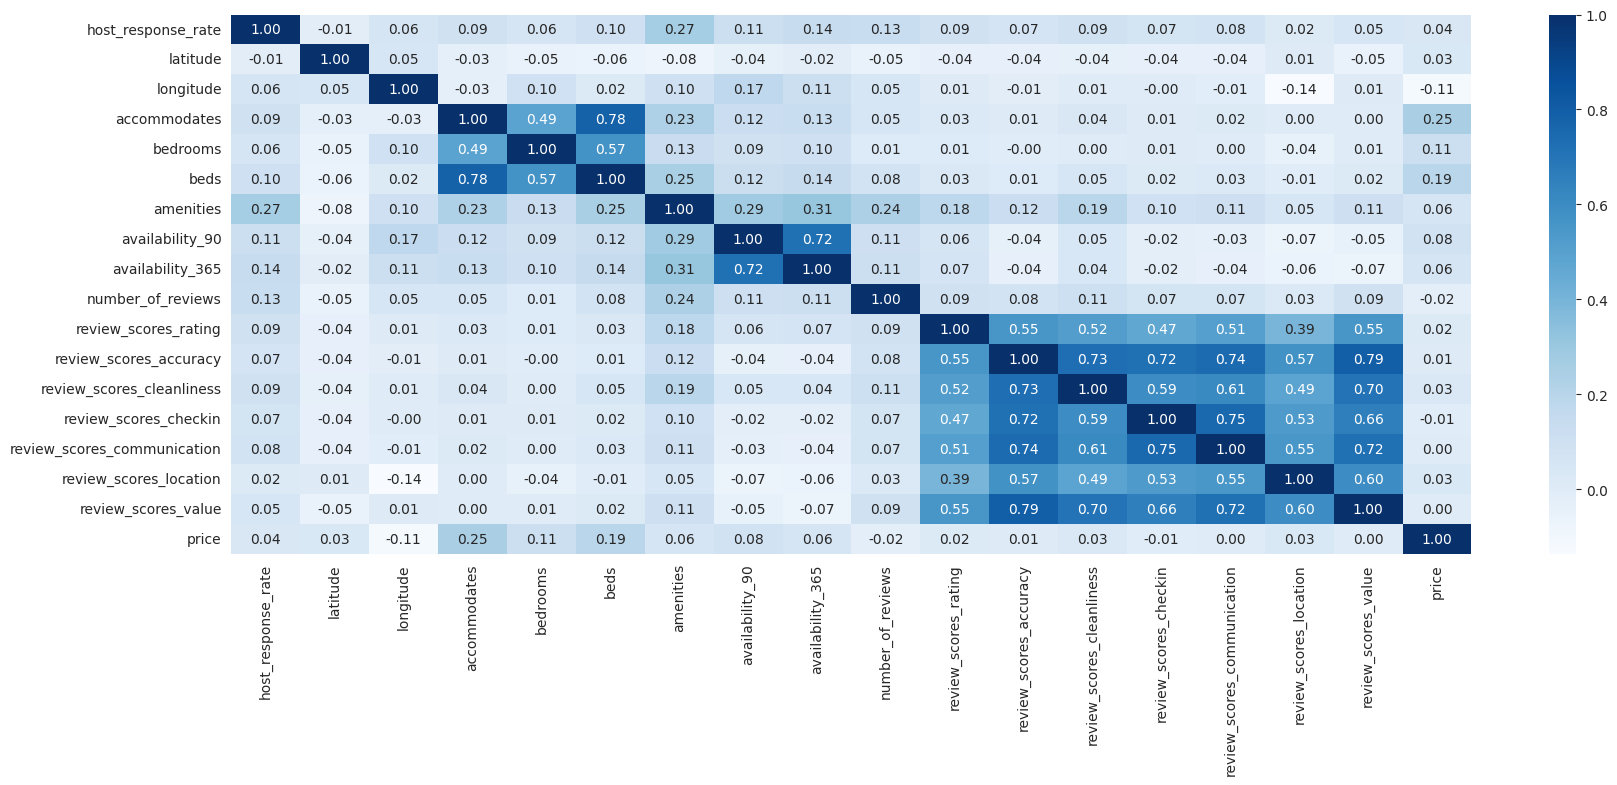

In [84]:
plt.figure(figsize=(20,7))
sns.heatmap(interval_variable.corr(), annot=True, fmt=".2f", cmap="Blues")

범주형 변수 시각화

시각화 3 - 막대그래프로 변수 구성 확인

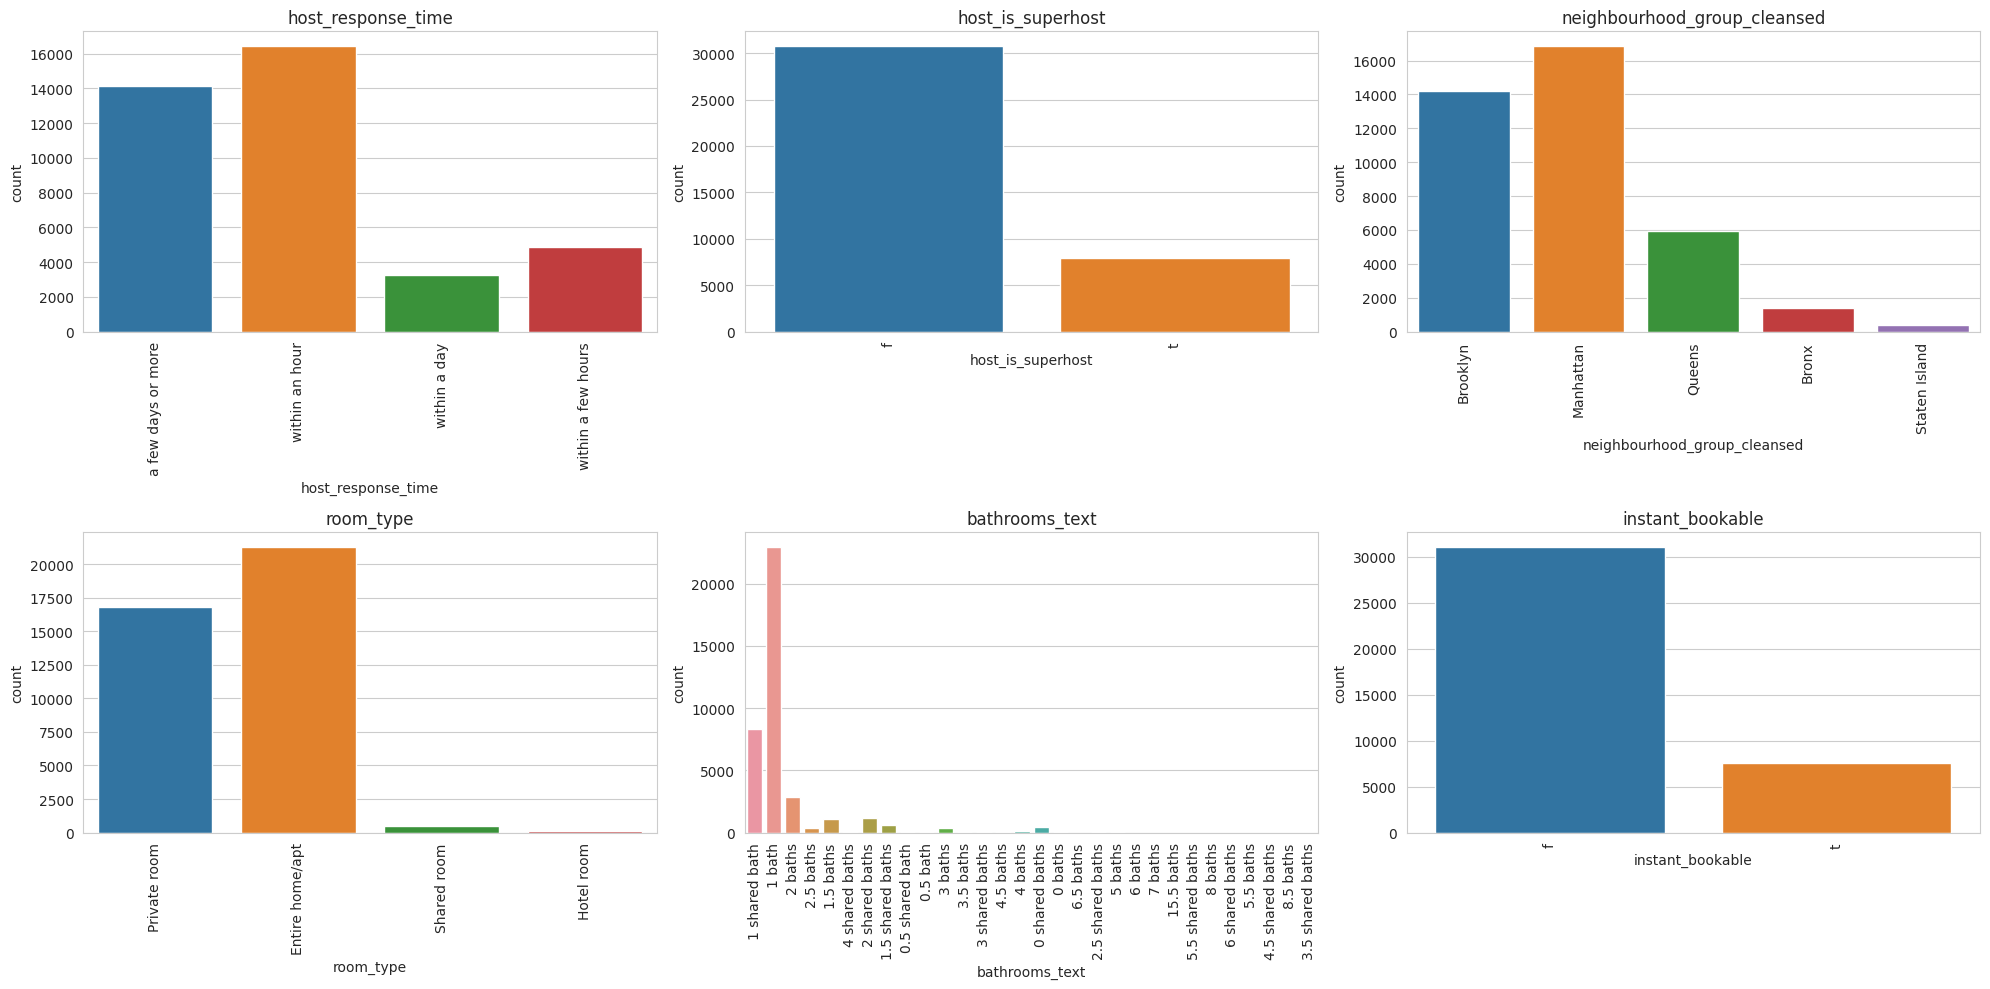

In [85]:
categorical_variable = preprocessing_completed[['host_response_time', 'host_is_superhost', 'neighbourhood_group_cleansed', 'room_type', 'bathrooms_text', 'instant_bookable', 'price_B']]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(categorical_variable.columns[:-1]):
    sns.countplot(x=col, data=categorical_variable, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

In [86]:
#host_response_time
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['host_response_time'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['host_response_time'], categorical_variable['price_B'], normalize=True))

col_0               count
host_response_time       
a few days or more  14117
within a day         3267
within a few hours   4900
within an hour      16466

price_B                  0.0       1.0
host_response_time                    
a few days or more  0.212155  0.152155
within a day        0.042039  0.042271
within a few hours  0.070632  0.055819
within an hour      0.173677  0.251252


In [87]:
#host_is_superhost
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['host_is_superhost'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['host_is_superhost'], categorical_variable['price_B'], normalize=True))

col_0              count
host_is_superhost       
f                  30804
t                   7946

price_B                 0.0       1.0
host_is_superhost                    
f                  0.404955  0.389987
t                  0.093548  0.111510


In [88]:
#neighbourhood_group_cleansed
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['neighbourhood_group_cleansed'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['neighbourhood_group_cleansed'], categorical_variable['price_B'], normalize=True))

col_0                         count
neighbourhood_group_cleansed       
Bronx                          1373
Brooklyn                      14177
Manhattan                     16882
Queens                         5946
Staten Island                   372

price_B                            0.0       1.0
neighbourhood_group_cleansed                    
Bronx                         0.025884  0.009548
Brooklyn                      0.212981  0.152877
Manhattan                     0.144516  0.291148
Queens                        0.108387  0.045058
Staten Island                 0.006735  0.002865


In [89]:
#room_type
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['room_type'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['room_type'], categorical_variable['price_B'], normalize=True))

col_0            count
room_type             
Entire home/apt  21311
Hotel room         129
Private room     16818
Shared room        492

price_B               0.0       1.0
room_type                          
Entire home/apt  0.145084  0.404877
Hotel room       0.000000  0.003329
Private room     0.343794  0.090219
Shared room      0.009626  0.003071


In [90]:
#bathrooms_text
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['bathrooms_text'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['bathrooms_text'], categorical_variable['price_B'], normalize=True))

col_0             count
bathrooms_text         
0 baths              59
0 shared baths      446
0.5 bath             54
0.5 shared bath      13
1 bath            22974
1 shared bath      8306
1.5 baths          1092
1.5 shared baths    613
15.5 baths            1
2 baths            2830
2 shared baths     1144
2.5 baths           367
2.5 shared baths     72
3 baths             382
3 shared baths       83
3.5 baths            79
3.5 shared baths      1
4 baths             133
4 shared baths       30
4.5 baths            36
4.5 shared baths      2
5 baths              14
5.5 baths             3
5.5 shared baths      1
6 baths               6
6 shared baths        1
6.5 baths             5
7 baths               1
8 baths               1
8.5 baths             1

price_B                0.0       1.0
bathrooms_text                      
0 baths           0.000568  0.000955
0 shared baths    0.009497  0.002013
0.5 bath          0.000723  0.000671
0.5 shared bath   0.000335  0.000000
1 bath   

In [91]:
#instant_bookable
#frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['instant_bookable'], columns='count'))
print()
#frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['instant_bookable'], categorical_variable['price_B'], normalize=True))

col_0             count
instant_bookable       
f                 31128
t                  7622

price_B                0.0       1.0
instant_bookable                    
f                 0.422865  0.380439
t                 0.075639  0.121058


구간 변수 t검정

In [92]:
from scipy import stats
# host_response_rate t-검정
data_host_response_rate_1 = interval_variable[categorical_variable['price_B'] == 1]['host_response_rate']
data_host_response_rate_0 = interval_variable[categorical_variable['price_B'] == 0]['host_response_rate']

stats.ttest_ind(data_host_response_rate_1, data_host_response_rate_0)

TtestResult(statistic=17.308295410091635, pvalue=7.273842649171194e-67, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 host_response_rate는 서로 다르다

In [93]:
# accommodates t-검정
data_accommodates_1 = interval_variable[categorical_variable['price_B'] == 1]['accommodates']
data_accommodates_0 = interval_variable[categorical_variable['price_B'] == 0]['accommodates']

stats.ttest_ind(data_accommodates_1, data_accommodates_0)

TtestResult(statistic=105.85739454056018, pvalue=0.0, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 accommodates는 서로 다르다

In [94]:
# bedrooms t-검정
data_bedrooms_1 = interval_variable[categorical_variable['price_B'] == 1]['bedrooms']
data_bedrooms_0 = interval_variable[categorical_variable['price_B'] == 0]['bedrooms']

stats.ttest_ind(data_bedrooms_1, data_bedrooms_0)

TtestResult(statistic=22.75898836015731, pvalue=6.544556451836452e-114, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 bedrooms는 서로 다르다

In [95]:
# beds t-검정
data_beds_1 = interval_variable[categorical_variable['price_B'] == 1]['beds']
data_beds_0 = interval_variable[categorical_variable['price_B'] == 0]['beds']

stats.ttest_ind(data_beds_1, data_beds_0)

TtestResult(statistic=80.90038738032332, pvalue=0.0, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 beds는 서로 다르다

In [96]:
# amenities t-검정
data_amenities_1 = interval_variable[categorical_variable['price_B'] == 1]['amenities']
data_amenities_0 = interval_variable[categorical_variable['price_B'] == 0]['amenities']

stats.ttest_ind(data_amenities_1, data_amenities_0)

TtestResult(statistic=45.84341552975711, pvalue=0.0, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 amenities는 서로 다르다

In [97]:
# availability_90 t-검정
data_availability_90_1 = interval_variable[categorical_variable['price_B'] == 1]['availability_90']
data_availability_90_0 = interval_variable[categorical_variable['price_B'] == 0]['availability_90']

stats.ttest_ind(data_availability_90_1, data_availability_90_0)

TtestResult(statistic=27.107036259943715, pvalue=2.5611462816654945e-160, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 availability_90은 서로 다르다

In [98]:
# availability_365 t-검정
data_aavailability_365_1 = interval_variable[categorical_variable['price_B'] == 1]['availability_365']
data_availability_365_0 = interval_variable[categorical_variable['price_B'] == 0]['availability_365']

stats.ttest_ind(data_aavailability_365_1, data_availability_365_0)

TtestResult(statistic=30.86722540160335, pvalue=1.0598580458310697e-206, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 availability_365는 서로 다르다

In [99]:
# number_of_reviews t-검정
data_number_of_reviews_1 = interval_variable[categorical_variable['price_B'] == 1]['number_of_reviews']
data_number_of_reviews_0 = interval_variable[categorical_variable['price_B'] == 0]['number_of_reviews']

stats.ttest_ind(data_number_of_reviews_1, data_number_of_reviews_0)

TtestResult(statistic=2.990068334137311, pvalue=0.0027909018290161337, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 number_of_reviews는 서로 다르다

In [100]:
# review_scores_rating t-검정
data_review_scores_rating_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_rating']
data_review_scores_rating_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_rating']

stats.ttest_ind(data_review_scores_rating_1, data_review_scores_rating_0)

TtestResult(statistic=13.298682367725586, pvalue=2.8873962495611256e-40, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_rating은 서로 다르다

In [101]:
# review_scores_accuracy t-검정
data_review_scores_accuracy_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_accuracy']
data_review_scores_accuracy_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_accuracy']

stats.ttest_ind(data_review_scores_accuracy_1, data_review_scores_accuracy_0)

TtestResult(statistic=8.2313534256371, pvalue=1.908337272185342e-16, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_accuracy는 서로 다르다

In [102]:
# review_scores_cleanliness t-검정
data_review_scores_cleanliness_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_cleanliness']
data_review_scores_cleanliness_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_cleanliness']

stats.ttest_ind(data_review_scores_cleanliness_1, data_review_scores_cleanliness_0)

TtestResult(statistic=19.117299718496696, pvalue=4.287926451071487e-81, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_cleanliness는 서로 다르다

In [103]:
# review_scores_checkin t-검정
data_review_scores_checkin_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_checkin']
data_review_scores_checkin_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_checkin']

stats.ttest_ind(data_review_scores_checkin_1, data_review_scores_checkin_0)

TtestResult(statistic=4.607397096367092, pvalue=4.090377500932186e-06, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_checkin은 서로 다르다

In [104]:
# review_scores_communication t-검정
data_review_scores_communication_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_communication']
data_review_scores_communication_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_communication']

stats.ttest_ind(data_review_scores_communication_1, data_review_scores_communication_0)

TtestResult(statistic=6.143368601205813, pvalue=8.157416634113921e-10, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_communication은 서로 다르다

In [105]:
# review_scores_location t-검정
data_review_scores_location_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_location']
data_review_scores_location_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_location']

stats.ttest_ind(data_review_scores_location_1, data_review_scores_location_0)

TtestResult(statistic=20.22835793130179, pvalue=1.619460337688526e-90, df=38748.0)

pvalue가 0.05보다 작으므로 귀무가설 기각
두 그룹의 review_scores_location은 서로 다르다

In [106]:
# review_scores_value t-검정
data_review_scores_value_1 = interval_variable[categorical_variable['price_B'] == 1]['review_scores_value']
data_review_scores_value_0 = interval_variable[categorical_variable['price_B'] == 0]['review_scores_value']

stats.ttest_ind(data_review_scores_value_1, data_review_scores_value_0)

TtestResult(statistic=0.6835163029902508, pvalue=0.4942847391351013, df=38748.0)

review_scores_value 변수만 귀무가설 채택 - 두 그룹별의 평균 점수는 차이가 없으므로 review_scores_value는 price_B 변수에 영향을 미칠 가능성이 작다

머신러닝 모델 수립


결정 트리, 로지스틱 회귀, 신경망 모델, K-최근접 이웃, 랜덤 포레스트, 그레디언트 부스팅, Lasso, SVM, XGBoost, LightGBM, 앙상블 등 여러 모델을 사용하여 가장 높은 정확도를 가지고 있는 모델 판별

머신 러닝 모델 실행

In [108]:
#구간 변수 데이터프레임에 price변수 추가 후 최종 확인
interval_variable['price'] = preprocessing_completed['price']
print(interval_variable.info())
print(categorical_variable.info())
interval_variable.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/interval_variable.csv', index = False)
categorical_variable.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/categorical_variable.csv', index = False)

<ipython-input-108-cee82b6a3987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_variable['price'] = preprocessing_completed['price']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38750 entries, 0 to 38749
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           38750 non-null  float64
 1   latitude                     38750 non-null  float64
 2   longitude                    38750 non-null  float64
 3   accommodates                 38750 non-null  int64  
 4   bedrooms                     38750 non-null  float64
 5   beds                         38750 non-null  float64
 6   amenities                    38750 non-null  int64  
 7   availability_90              38750 non-null  int64  
 8   availability_365             38750 non-null  int64  
 9   number_of_reviews            38750 non-null  int64  
 10  review_scores_rating         38750 non-null  float64
 11  review_scores_accuracy       38750 non-null  float64
 12  review_scores_cleanliness    38750 non-null  float64
 13  review_scores_ch